In [1]:
import pandas 
import numpy
import tensorflow

In [2]:
from sklearn.base import TransformerMixin, BaseEstimator

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns, output_type="matrix"):
        self.columns=columns
        self.output_type=output_type

    def transform(self, X, **tranform_params):
        if isinstance(X, list):
            X=pandas.DataFrame.from_dict(X)
        if self.output_type=="matrix":
            return self.output_type=="dataframe"
        elif self.output_type=="dataframe":
            return X[self.columns]
        raise Exception("output_type tienen que ser matrix o dataframe")

    def fit(self, X, y=None, **fit_params):
        return self

class ColumnDelete(BaseEstimator, TransformerMixin):
    def __init__(self, columns, deleteCols):
        self.columns=columns

    def transform(self, X, **tranform_params):
        X.drop(deleteCols, axis=1)
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [3]:
def deleteColumns(trainColsName, deleteCols):
    bool_res=True
    trainColsNameClean=[]
    for trainColName in trainColsName:
        for deleteCol in deleteCols:
            bool_res*=trainColName!=deleteCol
        trainColsNameClean.append(trainColName) if bool_res else _
        bool_res=True
    return trainColsNameClean

In [4]:
def get_dummies_df(columns_dummies):
    global X
    for column in columns_dummies:
        dummy=pandas.get_dummies(X[column],column, drop_first=True )
        X=pandas.concat([X, dummy], axis=1)
        X=X.drop(column, axis=1)

In [300]:
data=pandas.read_csv(r"./Datasets/Artificial_Neural_Networks/Churn_Modelling.csv")

In [301]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [302]:
columns=data.columns
targetColName="Exited"
trainColsName=[col for col in columns if col!=targetColName]
deleteCols=["RowNumber", "CustomerId", "Surname"]

y=data[targetColName]

trainColsNameClean=deleteColumns(trainColsName, deleteCols)
X=data[trainColsNameClean]

columns_dummies=["Gender", "Geography"]
get_dummies_df(columns_dummies)
X.head()

variables_numericas=["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "NumOfProducts"]
variables_categoricas=["HasCrCard", "IsActiveMember", "Gender_Male", "Geography_Germany", "Geography_Spain"]

In [303]:
X[variables_numericas].corr()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384,0.012238
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,-0.030680
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,0.013444
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797,-0.304180
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.014204
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,0.014204,1.000000


In [304]:
X=X.drop("Age", axis=1)
variables_numericas=[var for var in variables_numericas if var!="Age"]

In [305]:
X

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,2,0.00,1,1,1,101348.88,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1
2,502,8,159660.80,3,1,0,113931.57,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,771,5,0.00,2,1,0,96270.64,1,0,0
9996,516,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,7,0.00,1,0,1,42085.58,0,0,0
9998,772,3,75075.31,2,1,0,92888.52,1,1,0


In [306]:
X2=X[variables_numericas]

In [307]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2, interaction_only=False)
X2=poly.fit_transform(X2)


In [308]:
X2=pandas.DataFrame(X2[:,6:])
X=pandas.concat([X,X2],axis=1)

In [309]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
estimate_sel=RandomForestRegressor()
sel_rfe_rf=RFE(estimate_sel,n_features_to_select=20)
data_rfe_rf=sel_rfe_rf.fit_transform(X,y)
data_rfe_rf

array([[6.19000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.02715955e+10, 1.01348880e+05, 1.00000000e+00],
       [6.08000000e+02, 8.38078600e+04, 1.00000000e+00, ...,
        1.26658323e+10, 1.12542580e+05, 1.00000000e+00],
       [5.02000000e+02, 1.59660800e+05, 3.00000000e+00, ...,
        1.29804026e+10, 3.41794710e+05, 9.00000000e+00],
       ...,
       [7.09000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.77119604e+09, 4.20855800e+04, 1.00000000e+00],
       [7.72000000e+02, 7.50753100e+04, 2.00000000e+00, ...,
        8.62827715e+09, 1.85777040e+05, 4.00000000e+00],
       [7.92000000e+02, 1.30142790e+05, 1.00000000e+00, ...,
        1.45853568e+09, 3.81907800e+04, 1.00000000e+00]])

In [310]:
data_rfe_rf.shape

(10000, 20)

In [311]:
from sklearn.preprocessing import StandardScaler
Std_trans=StandardScaler()

In [312]:
Std_trans.fit(data_rfe_rf)

StandardScaler()

In [313]:
X=Std_trans.transform(data_rfe_rf)

In [314]:
X.shape

(10000, 20)

In [315]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

In [316]:
#y=data[targetColName]

In [317]:
ann=tensorflow.keras.models.Sequential()

In [318]:
ann.add(tensorflow.keras.layers.Dense(units=15, activation="relu")) 

In [319]:
ann.add(tensorflow.keras.layers.Dense(units=10, activation="sigmoid")) #relu rectificador

In [320]:
ann.add(tensorflow.keras.layers.Dense(units=5, activation="relu")) 

In [321]:
ann.add(tensorflow.keras.layers.Dense(units=1, activation="sigmoid")) #para no binario soft-max

In [322]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy") #para no binario category_crossentropy 

In [323]:
ann.fit(x_train, y_train, batch_size=9, epochs=40, verbose=1)

Epoch 1/40
778/778 [==============================] - 2s 2ms/step - loss: 0.4826 - accuracy: 0.8010
Epoch 2/40
778/778 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.7981
Epoch 3/40
778/778 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.7967
Epoch 4/40
778/778 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8045
Epoch 5/40
778/778 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8252
Epoch 6/40
778/778 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8281
Epoch 7/40
778/778 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8358
Epoch 8/40
778/778 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.8354
Epoch 9/40
778/778 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8224
Epoch 10/40
778/778 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8271

In [324]:
prediccion=ann.predict(x_test,verbose=1)

94/94 [==============================] - 0s 1ms/step


In [325]:
salida=[]
for i in range(100):
    y_pred=1.0*(prediccion>(i+1)/100)
    suma=0
    for yn, yb in zip(y_test, y_pred):
        suma+=(yn-yb)**2
    salida.append(suma)
    suma=0

In [326]:
y_test_p=numpy.array(y_test).reshape(len(y_test),1)

In [327]:
y_cont=numpy.concatenate((y_test_p,y_pred),1)

In [328]:
y_cont_df=pandas.DataFrame(y_cont)
y_cont_df[y_cont_df.columns[1]]=y_cont_df[y_cont_df.columns[1]].astype(float)
y_cont_df.columns=["A","B"]

In [329]:
pandas.crosstab(y_cont_df["A"],y_cont_df["B"],colnames=["B"], rownames=["A"]).T

A,0.0,1.0
B,,
0.0,2374,626


In [330]:
threshold=[((i*0.01)+.04) for i in range(40)]
sensivities=[1]
especifities_1=[1]
for i in threshold:
    y_pred=1.0*(prediccion>i)
    y_test_p=numpy.array(y_test).reshape(len(y_test),1)
    y_cont=numpy.concatenate((y_test_p,y_pred),1)
    y_cont_df=pandas.DataFrame(y_cont)
    y_cont_df[y_cont_df.columns[1]]=y_cont_df[y_cont_df.columns[1]].astype(float)
    y_cont_df.columns=["A","B"]
    confusion_matrix=pandas.crosstab(y_cont_df["A"],y_cont_df["B"],colnames=["B"], rownames=["A"]).T
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    sensivities.append(TP/(TP+FN))
    especifities_1.append(1-TN/(TN+FP))
sensivities.append(0)
especifities_1.append(0)

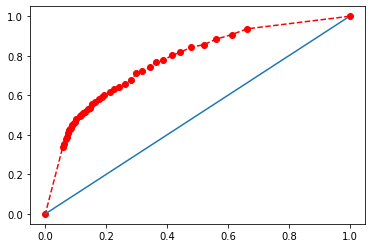

In [331]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(especifities_1,sensivities,marker="o",linestyle="--",color="r")
yv=[i*0.01 for i in range(100)]
x=yv
plt.plot(x,yv)

In [332]:
from sklearn.metrics import accuracy_score

In [333]:
y_p=ann.predict(x_test,verbose=1)

94/94 [==============================] - 0s 1ms/step


In [334]:
y_pred=1.0*(prediccion>0.51)
accuracy_score(y_pred,y_test)

0.8163333333333334

In [335]:
prediccion=ann.predict(x_train,verbose=1)
x_pd=1.0*(prediccion>0.51)

219/219 [==============================] - 0s 1ms/step


In [336]:
accuracy_score(x_pd,y_train)

0.8365714285714285